
Load mnist dataset. Normalize the data. Split the data into training, validation and testing set.

Build a CNN network with convolution layers, pooling layers to classify the number.

Plot the training loss and validation loss as a function of epochs.

Plot the both training accuracy and validation accuracy as a function of epochs.

Print the testing accuracy.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils as utils
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Split the training data into training and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
# Define the CNN model using nn.Sequential
model = nn.Sequential(
    # First convolutional layer
    nn.Conv2d(1, 32, kernel_size=3, padding=1),  # 1 input channel, 32 output channels (filters), 3x3 kernel size, padding=1
    nn.ReLU(),  # ReLU activation function

    # First max pooling layer
    nn.MaxPool2d(2),  # Max pooling with 2x2 kernel and default stride (stride=2)

    # Second convolutional layer
    nn.Conv2d(32, 64, kernel_size=3, padding=1),  # 32 input channels (from previous layer), 64 output channels, 3x3 kernel size, padding=1
    nn.ReLU(),  # ReLU activation function

    # Second max pooling layer
    nn.MaxPool2d(2),  # Max pooling with 2x2 kernel and default stride (stride=2)

    # Flatten layer to transition from convolutional to fully connected layers
    nn.Flatten(),  # Flatten the input tensor from 4D to 2D (batch_size x flattened_size)

    # First fully connected (linear) layer
    nn.Linear(64 * 7 * 7, 128),  # Input size calculated from the output of the second max pooling layer, output size of 128
    nn.ReLU(),  # ReLU activation function

    # Output fully connected (linear) layer
    nn.Linear(128, 10)  # Input size of 128 (output of previous linear layer), output size of 10 (number of classes in MNIST)
)
# Print model summary
print(model)

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=3136, out_features=128, bias=True)
  (8): ReLU()
  (9): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training the model
num_epochs = 10  # Number of epochs for training
train_losses = []  # List to store training losses per epoch
val_losses = []    # List to store validation losses per epoch
train_accs = []    # List to store training accuracies per epoch
val_accs = []      # List to store validation accuracies per epoch

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

 # Iterate over batches of training data
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Clear accumulated gradients
        outputs = model(inputs)  # Forward pass: compute predicted outputs by passing inputs to the model
        loss = criterion(outputs, labels)  # Compute the batch loss
        loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters
        optimizer.step()  # Update weights using optimizer

        running_loss += loss.item()  # Accumulate the training loss for this batch
        _, predicted = torch.max(outputs.data, 1)  # Get the class prediction for each sample in the batch
        total_train += labels.size(0)  # Increment the total number of training samples
        correct_train += (predicted == labels).sum().item()  # Increment the number of correctly predicted training samples

    train_loss = running_loss / len(train_loader)  # Average training loss across all batches
    train_acc = correct_train / total_train  # Training accuracy for this epoch

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    running_loss = 0.0  # Initialize running loss for validation
    correct_val = 0  # Initialize number of correctly predicted validation samples
    total_val = 0  # Initialize total number of validation samples

    # Disable gradient calculation for validation to save memory and computation
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)  # Forward pass: compute predicted outputs for validation
            loss = criterion(outputs, labels)  # Compute the validation loss
            running_loss += loss.item()  # Accumulate the validation loss
            _, predicted = torch.max(outputs.data, 1)  # Get the class prediction for each sample
            total_val += labels.size(0)  # Increment the total number of validation samples
            correct_val += (predicted == labels).sum().item()  # Increment the number of correctly predicted validation samples

    val_loss = running_loss / len(val_loader)
    val_acc = correct_val / total_val

    # Store metrics for plotting
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Epoch [{epoch + 1}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

Epoch [1/10], Train Loss: 0.1881, Train Acc: 0.9420, Val Loss: 0.0575, Val Acc: 0.9822
Epoch [2/10], Train Loss: 0.0518, Train Acc: 0.9848, Val Loss: 0.0386, Val Acc: 0.9892
Epoch [3/10], Train Loss: 0.0361, Train Acc: 0.9885, Val Loss: 0.0406, Val Acc: 0.9873
Epoch [4/10], Train Loss: 0.0271, Train Acc: 0.9914, Val Loss: 0.0418, Val Acc: 0.9876
Epoch [5/10], Train Loss: 0.0192, Train Acc: 0.9945, Val Loss: 0.0388, Val Acc: 0.9886
Epoch [6/10], Train Loss: 0.0185, Train Acc: 0.9940, Val Loss: 0.0323, Val Acc: 0.9893
Epoch [7/10], Train Loss: 0.0122, Train Acc: 0.9960, Val Loss: 0.0410, Val Acc: 0.9886
Epoch [8/10], Train Loss: 0.0119, Train Acc: 0.9961, Val Loss: 0.0432, Val Acc: 0.9865
Epoch [9/10], Train Loss: 0.0086, Train Acc: 0.9971, Val Loss: 0.0441, Val Acc: 0.9888
Epoch [10/10], Train Loss: 0.0078, Train Acc: 0.9974, Val Loss: 0.0488, Val Acc: 0.9876


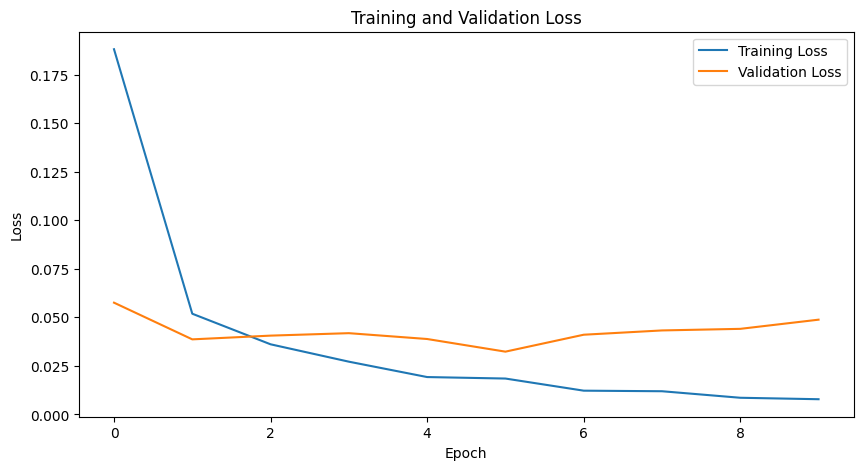

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

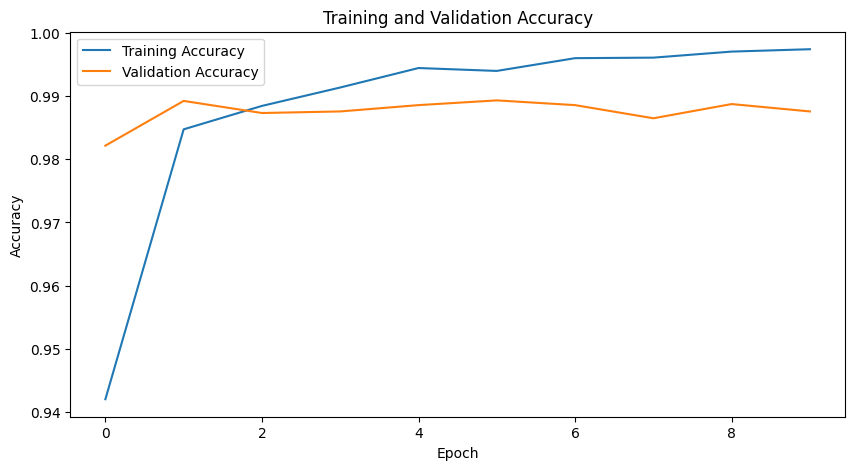

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Testing Accuracy: 99.00%


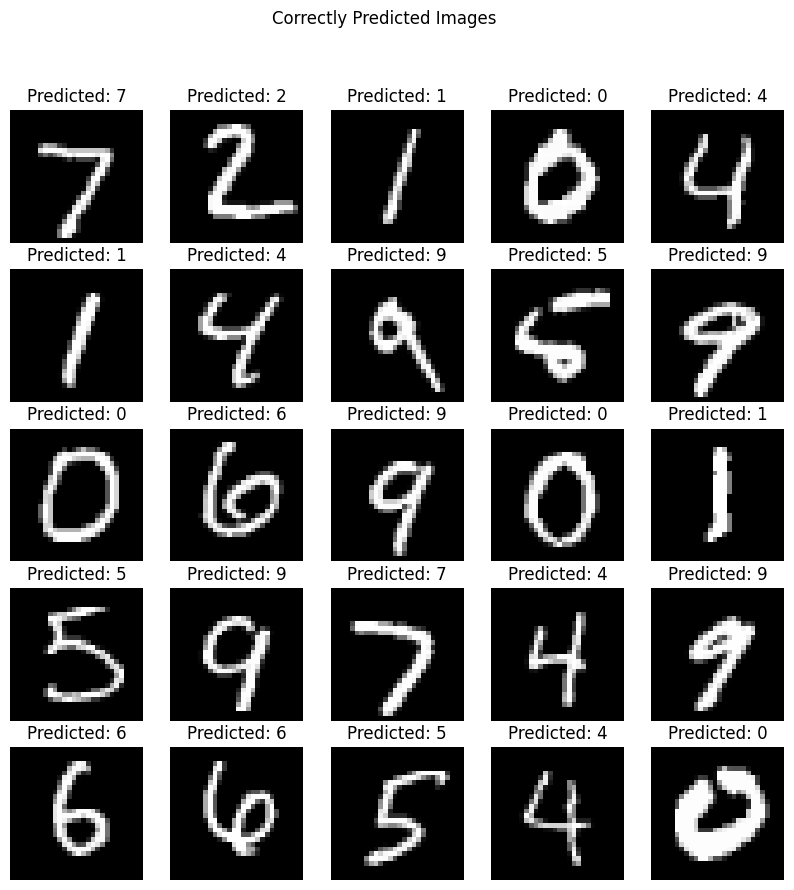

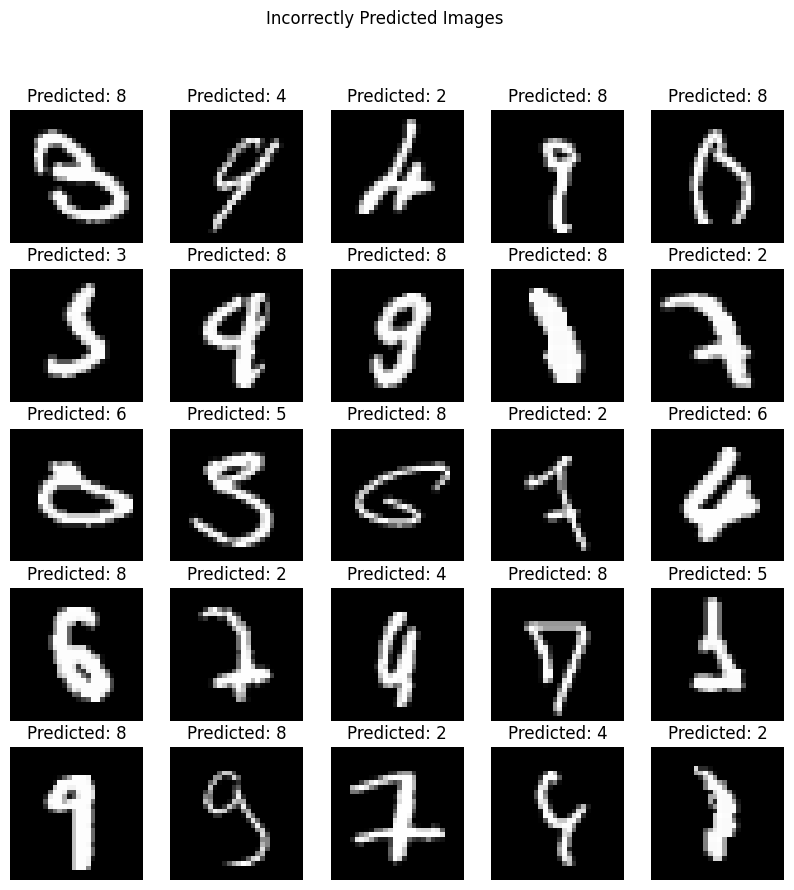

In [ ]:
# Testing phase
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

# Lists to store correctly and incorrectly predicted images for visualization
correct_images = []
correct_labels = []
incorrect_images = []
incorrect_labels = []

# Disable gradient calculation for testing to save memory and computation
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)  # Forward pass: compute predicted outputs for testing
        _, predicted = torch.max(outputs.data, 1)  # Get the class prediction for each sample
        total += labels.size(0)  # Increment the total number of test samples
        correct += (predicted == labels).sum().item()  # Increment the number of correctly predicted test samples

        # Collect images and labels for correct and incorrect predictions
        for i in range(len(labels)):
            if predicted[i] == labels[i]:
                correct_images.append(inputs[i])
                correct_labels.append(predicted[i])
            else:
                incorrect_images.append(inputs[i])
                incorrect_labels.append(predicted[i])

# Print testing accuracy
test_acc = correct / total
print(f"Testing Accuracy: {test_acc * 100:.2f}%")

# Function to plot images with their labels
def plot_images(images, labels, title):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.title(f'Predicted: {labels[i]}')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Plot correctly predicted images
plot_images(correct_images[:25], correct_labels[:25], title='Correctly Predicted Images')

# Plot incorrectly predicted images
plot_images(incorrect_images[:25], incorrect_labels[:25], title='Incorrectly Predicted Images')